<a href="https://colab.research.google.com/github/kmkkkp/2023_2_mogakso/blob/main/%EC%98%81%EC%83%81%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


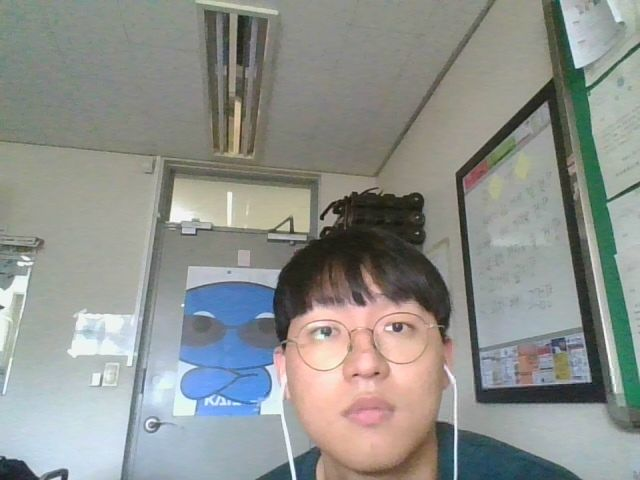

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

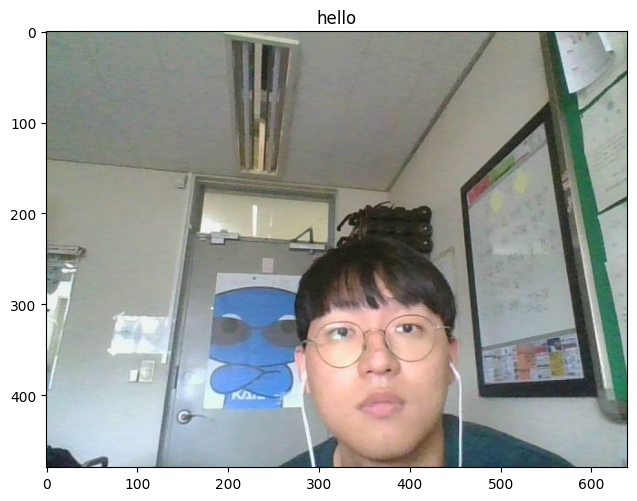

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

image = cv2.imread('/content/photo.jpg')
imshow("hello", image)

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
!unzip -qq haarcascades.zip

--2023-08-08 04:40:36--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.30, 52.95.150.90, 52.95.143.50, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276350 (270K) [application/zip]
Saving to: ‘haarcascades.zip’

haarcascades.zip    100%[===================>] 269.87K  --.-KB/s    in 0.05s   

2023-08-08 04:40:36 (5.61 MB/s) - ‘haarcascades.zip’ saved [276350/276350]



<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-15-49cce504bfc4>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


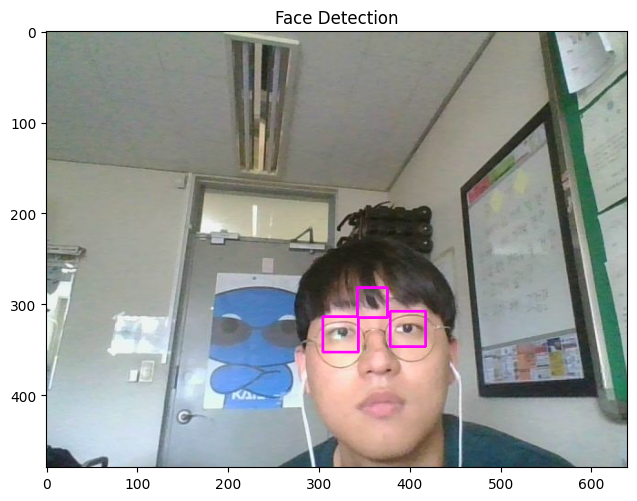

In [ ]:
image_2 = image.copy()

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# output: x,y,w,h
faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

if faces is ():
    print("No faces found")

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image_2[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, scaleFactor = 1.2)

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (255,0,255), 2)


imshow('Face Detection', image_2)

In [ ]:
def face_detecter(gray, frame):
    faces = face_classifier.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(100,100), flags=cv2.CASCADE_SCALE_IMAGE)

    #얼굴에 사각형 표시
    for(x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)

    return frame

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Our Face Extractor', face_detector(gray,frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()



error: ignored

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-08-08 05:15:55--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.106, 52.95.149.150, 52.95.148.18, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  67.7MB/s    in 0.4s    

2023-08-08 05:15:56 (67.7 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [ ]:
cap = cv2.VideoCapture('walking.mp4')
ret, frame = cap.read()

In [ ]:
cap = cv2.VideoCapture('walking.mp4')
ret, frame = cap.read()
cap.release()
imshow( frame)

AttributeError: ignored

# 영상분석

In [ ]:
cap = cv2.VideoCapture('/content/images/cars.avi')
w = int(cap.get(3))
h = int(cap.get(4))

output = cv2.VideoWriter('cars_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w,h))
w

320

In [ ]:
car_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

while True:

    ret, frame = cap.read()

    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cars = car_classifier.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 2)

        for (x,y,w,h) in cars:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

        output.write(frame)

    else:
        break

cap.release()
output.release()


In [ ]:
!ffmpeg -i /content/cars_output.avi cars_output.mp4 -y

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

In [ ]:
mp4 = open('cars_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)